[link text](https://)

STEP-1: Importing Necessary libraries and dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


In [2]:
##Importing the dataset
df=pd.read_csv('/content/train_loan.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


**STEP-2: Nescessary Preprocessing Steps.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#Removing the loan id column
df=df.drop('Loan_ID',axis=1)

In [8]:
#Checking the duplicates
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## **Plotting graphs**

[]

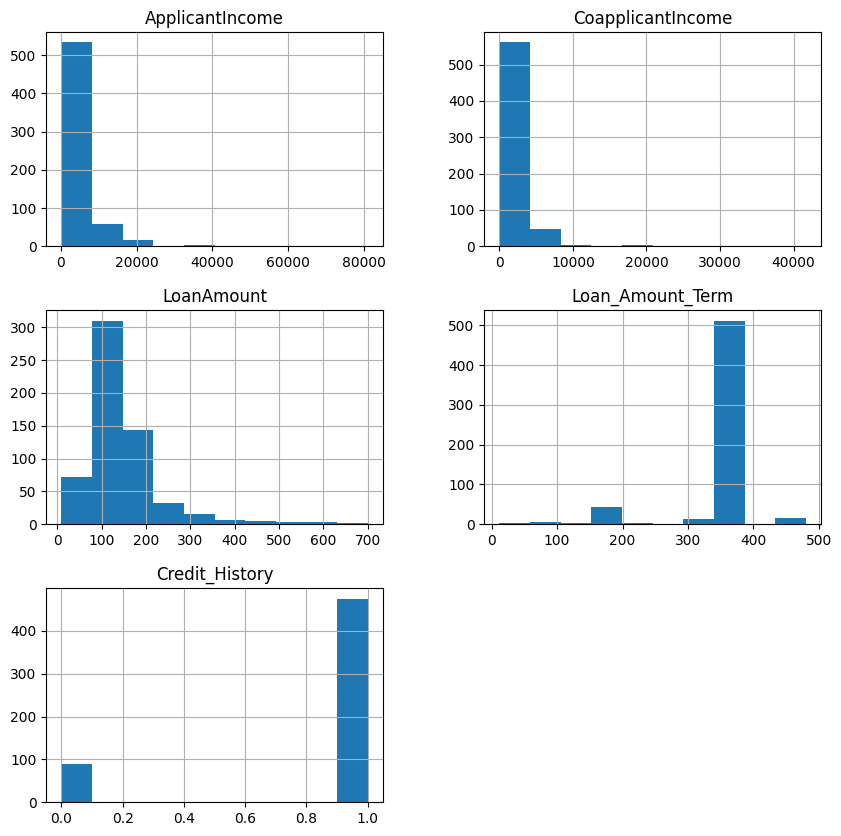

In [11]:
#Plotting histograms for numeric columns
df.hist(figsize=(10,10))
plt.plot()

<Axes: >

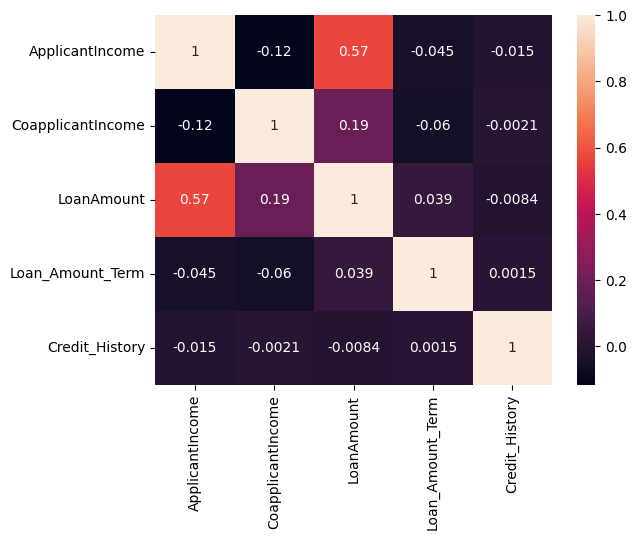

In [13]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot = True)

### **Outlier detection**

<Axes: >

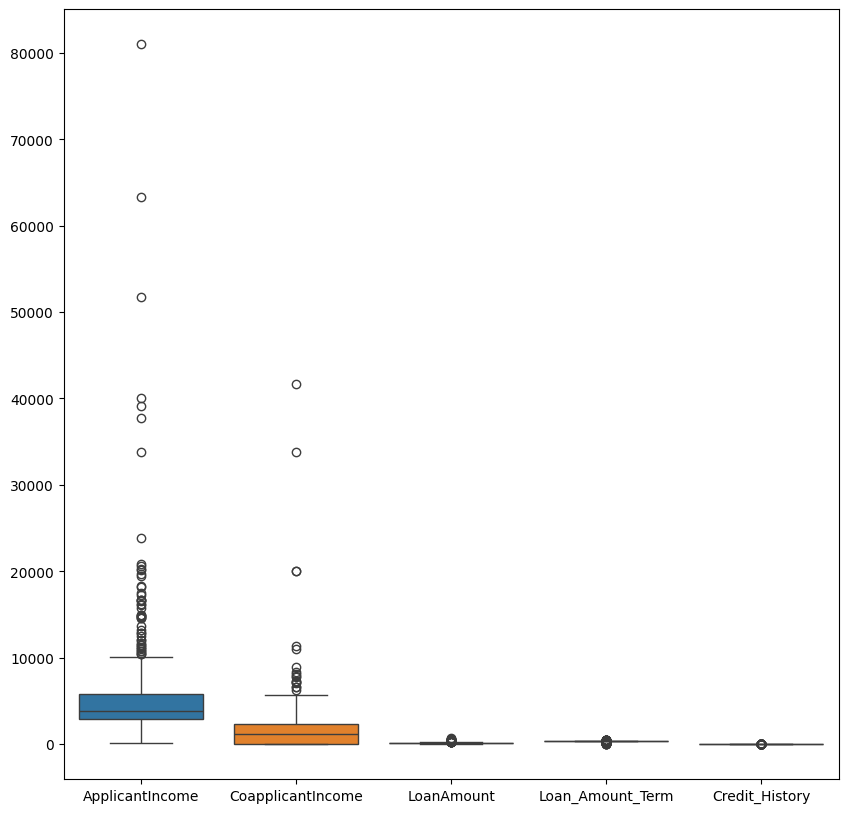

In [17]:
plt.figure(figsize= (10,10))
sns.boxplot(df)

## **Handling missing values**

In [37]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,134
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [18]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [19]:
#numerical columns
for column in df.select_dtypes(exclude='object'):
    imputer = KNNImputer()
    df[column] = imputer.fit_transform(df[[column]])


#categorical columns
for column in df.select_dtypes(include='object'):
    df[column] = df[column].fillna(df[column].mode()[0])

In [20]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [21]:
df.duplicated().sum()

0

# **Encoding**

In [22]:
for column in df.select_dtypes(include= 'object'):
    print(column)
    print(df[column].unique())

Gender
['Male' 'Female']
Married
['No' 'Yes']
Dependents
['0' '1' '2' '3+']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
Property_Area
['Urban' 'Rural' 'Semiurban']
Loan_Status
['Y' 'N']


In [23]:
for column in df.select_dtypes(include= 'object'):
    df[column] = df[column].map({'Male':0,'Female': 1,'No':0,'Yes':1,'0':0,'1':1,'2':2,'3+':3,'Graduate':1,'Not Graduare':0,'Rural':0,'Semiurban':1, 'Urban':2,'Y':1,'N':0})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          480 non-null    float64
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 57.7 KB


# **Feature Target split**

In [25]:
X = df.drop('Loan_Status', axis =1)
Y = df['Loan_Status']

# **Train Test Split**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### **Scaling**

In [27]:
sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

## **Random Forest Classification**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()
parameters = {
    'n_estimators' : [100, 20, 10, 200, 50],
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [None, 16,25,10,50],
    'n_jobs' : [2]
}
classifier_cv = GridSearchCV(classifier,param_grid=parameters, scoring= 'accuracy',n_jobs=2,
                             cv = 5)
classifier_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 16, 25, 10, 50],
                         'n_estimators': [100, 20, 10, 200, 50],
                         'n_jobs': [2]},
             scoring='accuracy')

In [29]:
classifier_cv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100, 'n_jobs': 2}

In [30]:
classifier = classifier_cv.best_estimator_
print(classifier_cv.best_score_)

y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8124716553287982
0.7723577235772358
0.7549019607843137


In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.7642276422764228
0.7628865979381443


# **AdaBoost Classifier**

In [34]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='mean')


scaled_x_train_imputed = imputer.fit_transform(scaled_x_train)


classifier = AdaBoostClassifier()
parameters = {
    'n_estimators': [100, 20, 10, 200, 50],
    'learning_rate': [0.1, 0.5, 0.6, 1, 0.7],
    'estimator': [DecisionTreeClassifier(), LogisticRegression(), GaussianNB()]
}
classifier_cv = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', n_jobs=2, cv=5)
classifier_cv.fit(scaled_x_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'estimator': [DecisionTreeClassifier(),
                                       LogisticRegression(), GaussianNB()],
                         'learning_rate': [0.1, 0.5, 0.6, 1, 0.7],
                         'n_estimators': [100, 20, 10, 200, 50]},
             scoring='accuracy')

In [36]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


imputer = SimpleImputer(strategy='mean')


scaled_x_train_imputed = imputer.fit_transform(scaled_x_train)


classifier = AdaBoostClassifier()
parameters = {
    'n_estimators': [100, 20, 10, 200, 50],
    'learning_rate': [0.1, 0.5, 0.6, 1, 0.7],
    'estimator': [DecisionTreeClassifier(), LogisticRegression(), GaussianNB()]
}
classifier_cv = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', n_jobs=2, cv=5)
classifier_cv.fit(scaled_x_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'estimator': [DecisionTreeClassifier(),
                                       LogisticRegression(), GaussianNB()],
                         'learning_rate': [0.1, 0.5, 0.6, 1, 0.7],
                         'n_estimators': [100, 20, 10, 200, 50]},
             scoring='accuracy')

# Bagging **Classifier**

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


imputer = SimpleImputer(strategy='mean')


scaled_x_train_imputed = imputer.fit_transform(scaled_x_train)

classifier = BaggingClassifier()
parameters = {
    'n_estimators' : [100, 20, 10, 200, 50],
    'estimator' : [LogisticRegression(),GaussianNB()]
}
classifier_cv = GridSearchCV(classifier,param_grid=parameters, scoring= 'accuracy',n_jobs=2,
                             cv = 5)
classifier_cv.fit(scaled_x_train_imputed,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=2,
             param_grid={'estimator': [LogisticRegression(), GaussianNB()],
                         'n_estimators': [100, 20, 10, 200, 50]},
             scoring='accuracy')

In [41]:
scaled_x_test_imputed = imputer.transform(scaled_x_test)

classifier = classifier_cv.best_estimator_
print(classifier_cv.best_score_)


y_pred = classifier.predict(scaled_x_test_imputed)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.810513296227582
0.7886178861788617
0.7596153846153846
